In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#style.use('fivethirtyeight')
sns.set(style='whitegrid')
#sns.set(style='fivethirtyeight')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Lending Club specialises in lending various types of loans to urban customers.Borrowers can easily access lower interest rate loans through a fast online interface. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. When a person applies for a loan,the company need to estimate their eligibilty criterias based on 2 possible scenarios described below:

Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan

In [80]:
lending = pd.read_csv('Lending.csv',encoding = "ISO-8859-1", low_memory=False)

it is up to the investor to decide which loan listing to invest in looking at the loan detail and borrowers information.variables chosen for analysis should enable the  investor in  deciding whether to invest in a loan request or not.we should Make a prediction model to predict the default on the loans. we need to state the precision and recall for default prediction from our model and also be able to estimate the top 5 variables for default prediction. we may ignore the subgrades of the loan while building this model.

> Indented block



In [81]:
lending.shape

(25281, 145)

As recorded above we have 25281 rows and 145 columns.we need to employ data cleaning and data preparation mechanisms before building the model.

In [82]:
lending.tail(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
25276,25277,NaN,10000,10000,10000,36 months,14.65,344.95,C,C5,NaN,NaN,OWN,36000.0,Verified,15-Oct,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,799xx,TX,15.23,0,Nov-72,1,NaN,20.0,11,1,12459,44.8,37,w,0,0,5511.190000,5511.19,3380.24,1440.92,0.0,690.03,124.2054,16-Dec,344.95,NaN,17-Jun,0,NaN,1,Individual,NaN,NaN,NaN,0,0,12459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27800,NaN,NaN,NaN,12,1133,13159.0,44.0,0,0,96.0,514,1,1,0,2.0,NaN,2.0,NaN,0,5,7,8,19,5,11,32.0,7,11,0.0,0,0,9,100.0,12.5,1,0,27800,12459,23500,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
25277,25278,NaN,5000,5000,5000,36 months,8.18,157.10,B,B1,senior Employment Coodinator,10+ years,MORTGAGE,40000.0,Source Verified,15-Oct,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,011xx,MA,14.01,0,Nov-00,1,60.0,63.0,9,1,3727,24.5,30,w,0,0,5439.162531,5439.16,5000.00,439.16,0.0,0.00,0.0000,17-Feb,3084.93,NaN,19-Jan,0,60.0,1,Individual,NaN,NaN,NaN,0,0,12235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15200,NaN,NaN,NaN,2,1359,5190.0,38.2,0,0,147.0,178,5,5,3,35.0,NaN,5.0,NaN,0,4,5,5,8,8,8,18.0,5,9,0.0,0,0,2,90.5,0.0,1,0,25200,12235,8400,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
25278,25279,NaN,26000,26000,26000,36 months,7.89,813.43,A,A5,"Coordinator for Assessment, Research, an",1 year,MORTGAGE,70000.0,Not Verified,15-Oct,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,436xx,OH,22.78,1,Sep-87,0,21.0,NaN,26,0,20902,42.9,49,f,0,0,29132.124580,29132.12,26000.00,3132.12,0.0,0.00,0.0000,18-Apr,754.05,NaN,19

Here we snowball to list the bottom five rows of our dataset.

In [83]:
print(lending.columns.values)

['id' 'member_id' 'loan_amnt' 'funded_amnt' 'funded_amnt_inv' 'term'
 'int_rate' 'installment' 'grade' 'sub_grade' 'emp_title' 'emp_length'
 'home_ownership' 'annual_inc' 'verification_status' 'issue_d'
 'loan_status' 'pymnt_plan' 'url' 'desc' 'purpose' 'title' 'zip_code'
 'addr_state' 'dti' 'delinq_2yrs' 'earliest_cr_line' 'inq_last_6mths'
 'mths_since_last_delinq' 'mths_since_last_record' 'open_acc' 'pub_rec'
 'revol_bal' 'revol_util' 'total_acc' 'initial_list_status' 'out_prncp'
 'out_prncp_inv' 'total_pymnt' 'total_pymnt_inv' 'total_rec_prncp'
 'total_rec_int' 'total_rec_late_fee' 'recoveries'
 'collection_recovery_fee' 'last_pymnt_d' 'last_pymnt_amnt' 'next_pymnt_d'
 'last_credit_pull_d' 'collections_12_mths_ex_med'
 'mths_since_last_major_derog' 'policy_code' 'application_type'
 'annual_inc_joint' 'dti_joint' 'verification_status_joint'
 'acc_now_delinq' 'tot_coll_amt' 'tot_cur_bal' 'open_acc_6m' 'open_act_il'
 'open_il_12m' 'open_il_24m' 'mths_since_rcnt_il' 'total_bal_il' 'il_u

In [84]:
lending.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,desc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,next_pymnt_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,25281.000000,0.0,25281.000000,25281.000000,25281.000000,25281.000000,25281.000000,2.528100e+04,0.0,0.0,25281.000000,25281.000000,25281.000000,13196.000000,4490.000000,25281.000000,25281.000000,25281.000000,25273.000000,25281.000000,25281.0,25281.0,25281.000000,25281.000000,25281.000000,25281.000000,25281.000000,25281.000000,25281.000000,25281.000000,0.0,25281.000000,7671.000000,25281.0,36.000000,36.000000,25281.000000,25281.000000,2.528100e+04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25281.000000,0.0,0.0,0.0,25281.000000,25281.000000,25014.000000,24998.000000,25281.000000,25281.000000,24410.000000,25281.000000,25281.000000,25281.000000,25281.000000,25022.000000,6504.000000,22355.000000,9248.000000,25281.000000,25281.000000,25281.000000,25281.000000,25281.000000,25281.000000,25281.000000,25280.000000,25281.000000,25281.000000,23631.000000,25281.000000,25281.000000,25281.000000,25281.000000,24975.000000,25281.000000,25281.000000,2.528100e+04,25281.000000,25281.000000,25281.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,104.0,104.000000,104.0,104.000000,76.000000,104.000000,104.000000,604.000000,604.000000,604.000000
mean,12641.000000,NaN,12765.653060,12765.653060,12761.726198,10.942294,416.472833,7.562123e+04,NaN,NaN,18.264472,0.367667,0.562596,34.020461,64.168151,11.603734,0.240141,16446.439540,51.438978,24.583838,0.0,0.0,13587.335597,13583.195192,11744.437822,1713.942827,1.463471,127.491478,22.935733,3441.756412,NaN,0.022665,43.789728,1.0,98023.898889,16.424167,0.005696,268.031921,1.330788e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33046.391084,NaN,NaN,NaN,4.490170,12719.814367,10086.731470,60.216913,0.010245,16.779795,125.272511,186.037736,13.640916,8.106404,1.563941,25.165814,40.061654,6.893670,35.759732,0.534670,3.620229,5.658202,4.710850,7.901665,8.217001,8.203987,14.530696,5.573118,11.538942,0.000762,0.004074,0.106246,2.109648,93.418658,45.050326,0.133539,0.067877,1.668595e+05,48394.553024,21597.678454,40638.073494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,67.643077,3.0,13.423077,198.448421,6510.084327,130.720577,3085.315298,47.256921,11.024834
std,7298.140414,NaN,8107.521585,8107.521585,8105.574792,3.552002,265.866142,6.684825

As reported above we can find the count of non null values for all existing variables.we also find mean,median,std.deviation,min,max for all variables and 25% and 75% quartile decides the inter quartile range.

In [85]:
missing = round(100*(lending.isnull().sum()/len(lending.id)), 2)
missing.loc[missing > 0]
print('len of columns with missing values is',len(missing.loc[missing > 0]))

member_id                                     100.00
emp_title                                       6.90
emp_length                                      6.88
url                                           100.00
desc                                          100.00
mths_since_last_delinq                         47.80
mths_since_last_record                         82.24
revol_util                                      0.03
last_pymnt_d                                    0.05
next_pymnt_d                                  100.00
mths_since_last_major_derog                    69.66
annual_inc_joint                               99.86
dti_joint                                      99.86
verification_status_joint                      99.86
open_acc_6m                                   100.00
open_act_il                                   100.00
open_il_12m                                   100.00
open_il_24m                                   100.00
mths_since_rcnt_il                            

len of columns with missing values is 68


In [86]:
columns_with_missing_values = list(missing[missing >= 50].index)

len(columns_with_missing_values)

56

here we find 56 variables which has more than 50% missing values with most of them mostly having missing values in range of 97%-100%.Building Models with these variables will not help build the appropriate prediction Models.so we will drop all these variables as part of our  data cleaning initiatives.also we will drop other two variables namely sub-grade and emp-title.

In [87]:
loan = lending.drop(columns_with_missing_values,axis=1)
loan = loan.drop(['sub_grade','emp_title'],axis=1)
loan.shape

(25281, 87)

In [88]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing[missing != 0]

emp_length                 6.88
mths_since_last_delinq    47.80
revol_util                 0.03
last_pymnt_d               0.05
bc_open_to_buy             1.06
bc_util                    1.12
mo_sin_old_il_acct         3.45
mths_since_recent_bc       1.02
mths_since_recent_inq     11.57
num_tl_120dpd_2m           6.53
percent_bc_gt_75           1.21
dtype: float64

In [89]:
print(loan.columns.values)
loan.tail(5)

['id' 'loan_amnt' 'funded_amnt' 'funded_amnt_inv' 'term' 'int_rate'
 'installment' 'grade' 'emp_length' 'home_ownership' 'annual_inc'
 'verification_status' 'issue_d' 'loan_status' 'pymnt_plan' 'purpose'
 'title' 'zip_code' 'addr_state' 'dti' 'delinq_2yrs' 'earliest_cr_line'
 'inq_last_6mths' 'mths_since_last_delinq' 'open_acc' 'pub_rec'
 'revol_bal' 'revol_util' 'total_acc' 'initial_list_status' 'out_prncp'
 'out_prncp_inv' 'total_pymnt' 'total_pymnt_inv' 'total_rec_prncp'
 'total_rec_int' 'total_rec_late_fee' 'recoveries'
 'collection_recovery_fee' 'last_pymnt_d' 'last_pymnt_amnt'
 'last_credit_pull_d' 'collections_12_mths_ex_med' 'policy_code'
 'application_type' 'acc_now_delinq' 'tot_coll_amt' 'tot_cur_bal'
 'total_rev_hi_lim' 'acc_open_past_24mths' 'avg_cur_bal' 'bc_open_to_buy'
 'bc_util' 'chargeoff_within_12_mths' 'delinq_amnt' 'mo_sin_old_il_acct'
 'mo_sin_old_rev_tl_op' 'mo_sin_rcnt_rev_tl_op' 'mo_sin_rcnt_tl'
 'mort_acc' 'mths_since_recent_bc' 'mths_since_recent_inq'
 'num_ac

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
25276,25277,10000,10000,10000,36 months,14.65,344.95,C,NaN,OWN,36000.0,Verified,15-Oct,Charged Off,n,debt_consolidation,Debt consolidation,799xx,TX,15.23,0,Nov-72,1,NaN,11,1,12459,44.8,37,w,0,0,5511.190000,5511.19,3380.24,1440.92,0.0,690.03,124.2054,16-Dec,344.95,17-Jun,0,1,Individual,0,0,12459,27800,12,1133,13159.0,44.0,0,0,96.0,514,1,1,0,2.0,2.0,0,5,7,8,19,5,11,32.0,7,11,0.0,0,0,9,100.0,12.5,1,0,27800,12459,23500,0,N,Cash,N
25277,25278,5000,5000,5000,36 months,8.18,157.10,B,10+ years,MORTGAGE,40000.0,Source Verified,15-Oct,Fully Paid,n,debt_consolidation,Debt consolidation,011xx,MA,14.01,0,Nov-00,1,60.0,9,1,3727,24.5,30,w,0,0,5439.162531,5439.16,5000.00,439.16,0.0,0.00,0.0000,17-Feb,3084.93,19-Jan,0,1,Individual,0,0,12235,15200,2,1359,5190.0,38.2,0,0,147.0,178,5,5,3,35.0,5.0,0,4,5,5,8,8,8,18.0,5,9,0.0,0,0,2,90.5,0.0,1,0,25200,12235,8400,10000,N,Cash,N
25278,25279,26000,26000,26000,36 months,7.89,813.43,A,1 year,MORTGAGE,70000.0,Not Verified,15-Oct,Fully Paid,n,credit_card,Credit card refinancing,436xx,OH,22.78,1,Sep-87,0,21.0,26,0,20902,42.9,49,f,0,0,29132.124580,29132.12,26000.00,3132.12,0.0,0.00,0.0000,18-Apr,754.05,19-Feb,0,1,Individual,0,0,197382,48700,6,8972,15013.0,52.3,0,0,193.0,336,13,13,4,13.0,0.0,0,9,15,10,12,17,23,28.0,15,26,0.0,0,0,0,95.9,10.0,0,0,247586,90711,31500,82186,N,Cash,N
25279,25280,25000,25000,25000,36 months,16.99,891.20,D,2 years,MORTGAGE,90000.0,Not Verified,15-Oct,Fully Paid,n,other,Other,727xx,AR,17.48,0,Dec-83,1,NaN,10,2,19491,77.7,43,w,0,0,32059.310190,32059.31,25000.00,7059.31,0.0,0.00,0.0000,18-Oct,890.91,19-Feb,0,1,Individual,0,0,302557,25100,1,33617,553.0,92.8,0,0,144.0,381,27,9,7,101.0,5.0,0,2,7,3,10,8,8,28.0,7,10,0.0,0,0,1,100.0,50.0,0,2,337698,64487,7700,48369,N,Cash,N
25280,25281,24825,24825,24825,36 months,16.55,879.53,D,1 year,RENT,252000.0,Source Verified,15-Oct,Fully Paid,n,debt_consolidation,Debt consolidation,996xx,AK,19.59,0,Oct-81,2,29.0,14,3,2062,2.8,30,w,0,0,31640.213120,31640.21,24825.00,6815.21,0.0,0.00,0.0000,18-Oct,879.49,19-Feb,0,1,Individual,0,154,192443,46000,6,14803,35802.0,3.3,0,0,304.0,407,19,2,1,19.0,1.0,1,2,3,4,5,20,6,9.0,3,14,0.0,0,0,5,82.6,33.3,0,3,292355,192443,37500,246355,N,Cash,N


In [90]:
loan.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,25281.000000,25281.000000,25281.000000,25281.000000,25281.000000,25281.000000,2.528100e+04,25281.000000,25281.000000,25281.000000,13196.000000,25281.000000,25281.000000,25281.000000,25273.000000,25281.000000,25281.0,25281.0,25281.000000,25281.000000,25281.000000,25281.000000,25281.000000,25281.000000,25281.000000,25281.000000,25281.000000,25281.0,25281.000000,25281.000000,2.528100e+04,25281.000000,25281.000000,25281.000000,25014.000000,24998.000000,25281.000000,25281.000000,24410.000000,25281.000000,25281.000000,25281.000000,25281.000000,25022.000000,22355.000000,25281.000000,25281.000000,25281.000000,25281.000000,25281.000000,25281.000000,25281.000000,25280.000000,25281.000000,25281.000000,23631.000000,25281.000000,25281.000000,25281.000000,25281.000000,24975.000000,25281.000000,25281.000000,2.528100e+04,25281.000000,25281.000000,25281.000000
mean,12641.000000,12765.653060,12765.653060,12761.726198,10.942294,416.472833,7.562123e+04,18.264472,0.367667,0.562596,34.020461,11.603734,0.240141,16446.439540,51.438978,24.583838,0.0,0.0,13587.335597,13583.195192,11744.437822,1713.942827,1.463471,127.491478,22.935733,3441.756412,0.022665,1.0,0.005696,268.031921,1.330788e+05,33046.391084,4.490170,12719.814367,10086.731470,60.216913,0.010245,16.779795,125.272511,186.037736,13.640916,8.106404,1.563941,25.165814,6.893670,0.534670,3.620229,5.658202,4.710850,7.901665,8.217001,8.203987,14.530696,5.573118,11.538942,0.000762,0.004074,0.106246,2.109648,93.418658,45.050326,0.133539,0.067877,1.668595e+05,48394.553024,21597.678454,40638.073494
std,7298.140414,8107.521585,8107.521585,8105.574792,3.552002,265.866142,6.684825e+04,8.546491,0.974102,0.855437,21.878583,5.636238,0.672267,22939.560771,23.802519,12.170331,0.0,0.0,9199.124846,9196.639640,8160.762812,1436.541015,10.827741,609.102609,110.586086,5086.778735,0.164492,0.0,0.078348,1812.766245,1.590013e+05,34596.524703,3.130254,16251.050190,15383.853968,27.844288,0.118058,831.327492,52.718328,98.493543,17.506965,9.353200,1.927266,32.600854,5.943383,1.354404,2.295107,3.385851,3.091231,4.836093,7.454173,4.646188,8.402067,3.252610,5.612204,0.027589,0.067323,0.573844,1.820354,9.414447,36.443189,0.385413,0.463609,1.884806e+05,47271.491347,22279.942390,42434.276672
min,1.000000,1000.000000,1000.000000,1000.000000,5.320000,30.120000,7.000000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,2.500000e+03,0.000000,0.000000,0.000000
25%,6321.000000,6500.000000,6500.000000,6500.000000,7.890000,213.890000,4.500000e+04,11.730000,0.000000,0.000000,15.000000,8.000000,0.000000,5762.000000,33.

In [91]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25281 entries, 0 to 25280
Data columns (total 87 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          25281 non-null  int64  
 1   loan_amnt                   25281 non-null  int64  
 2   funded_amnt                 25281 non-null  int64  
 3   funded_amnt_inv             25281 non-null  int64  
 4   term                        25281 non-null  object 
 5   int_rate                    25281 non-null  float64
 6   installment                 25281 non-null  float64
 7   grade                       25281 non-null  object 
 8   emp_length                  23541 non-null  object 
 9   home_ownership              25281 non-null  object 
 10  annual_inc                  25281 non-null  float64
 11  verification_status         25281 non-null  object 
 12  issue_d                     25281 non-null  object 
 13  loan_status                 252

In [92]:
print(loan.isnull().sum())

id                                0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
emp_length                     1740
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
purpose                           0
title                             0
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
mths_since_last_delinq        12085
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                  

Here we find some categorical variables which we would like to transform to Numerical variables which is required for Building our Models.

In [93]:
for x in loan.columns:  
  if loan[x].dtype=='object':
      loan[x]=pd.Categorical(loan[x]).codes
loan.head(10)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,1,6000,6000,6000,0,6.24,183.19,0,1,2,61000.0,0,0,1,0,2,3,216,43,10.35,0,168,0,NaN,4,0,4636,18.9,8,1,0,0,6590.474814,6590.47,6000.00,590.47,0.0,0.00,0.0000,36,182.98,38,0,1,0,0,0,26778,24500,1,6695,18000.0,0.0,0,0,14.0,318,69,14,1,173.0,14.0,0,0,2,1,3,1,3,6.0,2,4,0.0,0,0,0,100.0,0.0,0,0,50816,26778,18000,26316,0,0,0
1,2,12000,12000,12000,0,12.05,398.86,2,1,1,95000.0,0,0,1,0,2,3,651,41,9.07,0,7,1,43.0,11,0,16134,75.4,24,0,0,0,14239.607600,14239.61,12000.00,2239.61,0.0,0.00,0.0000,27,3084.67,40,0,1,0,0,825,399066,21400,4,44341,934.0,92.8,0,0,175.0,163,5,5,3,5.0,0.0,0,3,5,3,3,8,8,13.0,5,11,0.0,0,0,2,95.8,100.0,0,0,421456,32555,13000,20757,0,0,0
2,3,3000,3000,3000,0,6.24,91.60,0,1,0,75000.0,0,0,1,0,6,8,407,33,15.87,0,559,0,NaN,12,0,5494,19.6,29,1,0,0,3219.809541,3219.81,3000.00,219.81,0.0,0.00,0.0000,23,1664.69,40,0,1,0,0,0,155662,28100,4,12972,17645.0,22.9,0,0,190.0,253,10,7,5,24.0,9.0,1,3,5,5,8,9,8,15.0,5,12,0.0,0,0,3,96.6,0.0,0,0,197463,28184,22900,38818,0,0,0
3,4,20000,20000,20000,0,11.49,659.43,1,1,0,80000.0,1,0,0,0,3,6,402,33,31.14,1,350,0,22.0,16,0,28847,71.9,40,0,0,0,5249.910000,5249.91,3871.32,1378.59,0.0,0.00,0.0000,8,659.43,18,0,1,0,0,0,194096,40100,8,12131,2947.0,88.1,0,0,118.0,243,2,2,3,133.0,6.0,0,4,7,4,9,6,9,29.0,7,16,0.0,0,0,4,95.0,50.0,0,0,241876,71251,24700,71230,0,0,0
4,5,8550,8550,8400,0,16.99,304.79,3,2,0,28000.0,1,0,1,0,2,3,405,33,14.50,0,25,1,NaN,9,0,5129,33.3,10,0,0,0,10756.510840,10567.80,8550.00,2206.51,0.0,0.00,0.0000,30,2601.23,31,0,1,0,0,0,87956,15400,6,10995,2611.0,39.3,0,0,50.0,38,2,2,1,7.0,2.0,0,2,5,2,3,2,6,7.0,5,9,0.0,0,0,4,100.0,0.0,0,0,102075,26187,4300,24817,0,0,0
5,6,10000,10000,10000,0,14.33,343.39,2,8,0,60181.0,1,0,1,0,1,2,715,48,16.35,0,114,1,74.0,8,1,8952,39.3,12,0,0,0,12038.452080,12038.45,10000.00,2038.45,0.0,0.00,0.0000,24,3868.74,25,0,1,0,0,0,210192,22800,6,26274,9561.0,39.9,0,0,95.0,77,12,2,2,20.0,2.0,0,1,3,2,2,3,5,7.0,3,8,0.0,0,0,3,91.7,0.0,0,0,234244,40585,15900,32107,0,0,0
6,7,13300,13300,13300,0,13.67,452.44,2,10,2,76748.0,2,0,1,0,2,3,766,4,10.04,0,65,0,NaN,7,0,6239,48.4,22,1,0,0,15846.638260,15846.64,13300.00,2546.64,0.0,0.00,0.0000,25,5913.16,40,0,1,0,0,0,63519,12900,8,9074,5455.0,52.1,0,0,80.0,120,0,0,0,5.0,10.0,0,2,3,3,6,12,4,8.0,3,7,0.0,0,0,6,100.0,0.0,0,0,71149,63519,11400,56384,0,0,0
7,8,5000,5000,5000,0,9.17,159.40,1,1,2,37000.0,2,0,1,0,2,3,392,33,24.34,2,522,0,17.0,4,0,3244,79.1,25,1,0,0,5363.090000,5363.09,5000.00,363.09,0.0,0.00,0.0000,14,3933.58,41,0,1,0,0,0,14909,4100,2,3727,NaN,NaN,0,0,151.0,264,7,7,0,NaN,8.0,2,0,3,0,5,10,3,15.0,3,4,0.0,0,0,1,72.0,NaN,0,0,18663,14909,0,14563,0,0,0
8,9,10000,10000,10000,0,12.59,334.97,2,6,2,25073.0,0,0,1,0,1,2,108,32,28.05,0,95,0,NaN,20,0,9591,33.7,21,1,0,0,12044.847320,12044.85,10000.00,2044.85,0.0,0

In [94]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25281 entries, 0 to 25280
Data columns (total 87 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          25281 non-null  int64  
 1   loan_amnt                   25281 non-null  int64  
 2   funded_amnt                 25281 non-null  int64  
 3   funded_amnt_inv             25281 non-null  int64  
 4   term                        25281 non-null  int8   
 5   int_rate                    25281 non-null  float64
 6   installment                 25281 non-null  float64
 7   grade                       25281 non-null  int8   
 8   emp_length                  25281 non-null  int8   
 9   home_ownership              25281 non-null  int8   
 10  annual_inc                  25281 non-null  float64
 11  verification_status         25281 non-null  int8   
 12  issue_d                     25281 non-null  int8   
 13  loan_status                 252

In [95]:
loan=loan.fillna(0)
print(loan.isnull().sum())

id                            0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prnc

here there are many variables which has NAN values but which are significant.hence we will give the benefit of doubts to the client and impute all these variables with the value 0.

<Figure size 360x504 with 0 Axes>

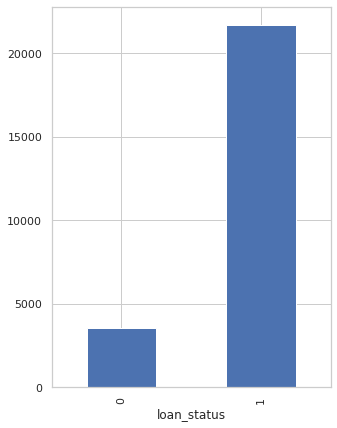

In [96]:
plt.figure(figsize=(5,7))
ax = loan.groupby('loan_status').loan_amnt.count().plot.bar()
plt.show()

In [106]:
print(loan.groupby('loan_status').loan_amnt.count())

loan_status
0     3578
1    21703
Name: loan_amnt, dtype: int64


Here we plotted a bar plot to estimate the number of customers whose loan status is defaulter(3578)versus those who are fully paid(21703)

In [97]:
#create features and labels
x=loan.drop('loan_status',axis=1)
y=loan['loan_status']
x.head()
y.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,1,6000,6000,6000,0,6.24,183.19,0,1,2,61000.0,0,0,0,2,3,216,43,10.35,0,168,0,0.0,4,0,4636,18.9,8,1,0,0,6590.474814,6590.47,6000.00,590.47,0.0,0.0,0.0,36,182.98,38,0,1,0,0,0,26778,24500,1,6695,18000.0,0.0,0,0,14.0,318,69,14,1,173.0,14.0,0,0,2,1,3,1,3,6.0,2,4,0.0,0,0,0,100.0,0.0,0,0,50816,26778,18000,26316,0,0,0
1,2,12000,12000,12000,0,12.05,398.86,2,1,1,95000.0,0,0,0,2,3,651,41,9.07,0,7,1,43.0,11,0,16134,75.4,24,0,0,0,14239.607600,14239.61,12000.00,2239.61,0.0,0.0,0.0,27,3084.67,40,0,1,0,0,825,399066,21400,4,44341,934.0,92.8,0,0,175.0,163,5,5,3,5.0,0.0,0,3,5,3,3,8,8,13.0,5,11,0.0,0,0,2,95.8,100.0,0,0,421456,32555,13000,20757,0,0,0
2,3,3000,3000,3000,0,6.24,91.60,0,1,0,75000.0,0,0,0,6,8,407,33,15.87,0,559,0,0.0,12,0,5494,19.6,29,1,0,0,3219.809541,3219.81,3000.00,219.81,0.0,0.0,0.0,23,1664.69,40,0,1,0,0,0,155662,28100,4,12972,17645.0,22.9,0,0,190.0,253,10,7,5,24.0,9.0,1,3,5,5,8,9,8,15.0,5,12,0.0,0,0,3,96.6,0.0,0,0,197463,28184,22900,38818,0,0,0
3,4,20000,20000,20000,0,11.49,659.43,1,1,0,80000.0,1,0,0,3,6,402,33,31.14,1,350,0,22.0,16,0,28847,71.9,40,0,0,0,5249.910000,5249.91,3871.32,1378.59,0.0,0.0,0.0,8,659.43,18,0,1,0,0,0,194096,40100,8,12131,2947.0,88.1,0,0,118.0,243,2,2,3,133.0,6.0,0,4,7,4,9,6,9,29.0,7,16,0.0,0,0,4,95.0,50.0,0,0,241876,71251,24700,71230,0,0,0
4,5,8550,8550,8400,0,16.99,304.79,3,2,0,28000.0,1,0,0,2,3,405,33,14.50,0,25,1,0.0,9,0,5129,33.3,10,0,0,0,10756.510840,10567.80,8550.00,2206.51,0.0,0.0,0.0,30,2601.23,31,0,1,0,0,0,87956,15400,6,10995,2611.0,39.3,0,0,50.0,38,2,2,1,7.0,2.0,0,2,5,2,3,2,6,7.0,5,9,0.0,0,0,4,100.0,0.0,0,0,102075,26187,4300,24817,0,0,0


0    1
1    1
2    1
3    0
4    1
Name: loan_status, dtype: int8

In [108]:
correlation=loan.corr()
correlation.head(10)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
id,1.000000,0.019660,0.019660,0.019871,NaN,0.030799,0.022268,0.033420,-0.004435,-0.001104,0.015644,0.018091,NaN,-0.019337,NaN,0.003512,-0.004751,0.010325,0.007329,0.029950,-0.007758,0.018751,0.004844,-0.002204,0.021604,0.015063,0.022415,0.018836,0.008696,-0.143005,NaN,NaN,0.014873,0.015072,0.010620,0.030301,0.012830,0.010646,0.010848,0.009438,-0.005695,-0.010157,-0.000463,NaN,-0.038938,0.001876,-0.012325,-0.003320,0.018643,0.007584,-0.011577,0.003355,0.013098,0.006548,0.002211,0.012949,0.020106,0.004267,0.013636,-0.000245,-0.002771,0.018276,-0.010726,0.041881,0.041645,0.041638,0.020202,-0.006852,0.026068,0.019527,0.039999,0.019969,0.004639,-0.000163,-0.005144,-0.000562,-0.003854,0.011994,0.019740,0.004162,-0.004863,0.013058,0.018621,0.005212,NaN,NaN,-0.000079
loan_amnt,0.019660,1.000000,1.000000,0.999996,NaN,-0.105670,0.995237,-0.108317,-0.004956,-0.173859,0.375469,-0.004557,NaN,0.016008,NaN,-0.170473,-0.180192,0.010860,0.007073,-0.024352,-0.010070,0.129504,-0.055459,-0.026798,0.190530,-0.083156,0.374721,0.106992,0.204098,0.018707,NaN,NaN,0.936937,0.936960,0.913390,0.752203,0.081769,0.137233,0.136384,0.012515,0.434312,-0.019400,-0.018711,NaN,0.003692,-0.006541,-0.029080,0.319217,0.403024,-0.028569,0.233859,0.234870,0.046234,-0.006114,-0.010358,0.137448,0.193018,0.064014,0.049251,0.224899,0.045112,0.004916,-0.055907,0.235399,0.172777,0.252273,0.228076,0.052587,0.190097,0.191390,0.170345,0.190848,-0.008621,-0.007089,-0.036210,-0.050941,0.098794,0.005412,-0.130031,0.010516,0.331591,0.288623,0.431295,0.190285,NaN,NaN,0.001640
funded_amnt,0.019660,1.000000,1.000000,0.999996,NaN,-0.105670,0.995237,-0.108317,-0.004956,-0.173859,0.375469,-0.004557,NaN,0.016008,NaN,-0.170473,-0.180192,0.010860,0.007073,-0.024352,-0.010070,0.129504,-0.055459,-0.026798,0.190530,-0.083156,0.374721,0.106992,0.204098,0.018707,NaN,NaN,0.936937,0.936960,0.913390,0.752203,0.081769,0.137233,0.136384,0.012515,0.434312,-0.019400,-0.018711,NaN,0.003692,-0.006541,-0.029080,0.319217,0.403024,-0.028569,0.233859,0.234870,0.046234,-0.006114,-0.010358,0.137448,0.193018,0.064014,0.049251,0.224899,0.045112,0.004916,-0.055907,0.235399,0.172777,0.252273,0.228076,0.052587,0.190097,0.191390,0.170345,0.190848,-0.008621,-0.007089,-0.036210,-0.050941,0.098794,0.005412,-0.130031,0.010516,0.331591,0.288623,0.431295,0.190285,NaN,NaN,0.001640
funded_amnt_inv,0.019871,0.999996,0.999996,1.000000,NaN,-0.106202,0.995178,-0.108866,-0.004974,-0.173834,0.375550,-0.004725,NaN,0.016116,NaN,-0.170489,-0.180219,0.010822,0.007117,-0.024474,-0.010119,0.129544,-0.055560,-0.026829,0.190566,-0.083134,0.374765,0.106861,0.204148,0.019324,NaN,NaN,0.936938,0.936969,0.913441,0.751972,0.081728,0.137108,0.136260,0.012587,0.434298,-0.019350,-0.018721,NaN,0.003705,-0.006533

In [99]:
from sklearn.preprocessing import scale
x_scaled=scale(loan)
x_scaled=pd.DataFrame(x_scaled,columns=loan.columns)
x_scaled.head()
x_scaled.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,-1.731982,-0.834507,-0.834507,-0.834223,0.0,-1.323870,-0.877462,-1.224850,-0.700754,1.121499,-0.218727,-1.437545,0.0,0.406032,0.0,-0.191338,-0.232636,-0.887549,1.476403,-0.926068,-0.377450,-0.322584,-0.657685,-0.765148,-1.349106,-0.357218,-0.514860,-1.365590,-1.362672,0.764798,0.0,0.0,-0.760616,-0.760372,-0.703923,-0.782084,-0.135162,-0.209314,-0.207406,0.997277,-0.640649,0.449563,-0.137792,0.0,-0.037763,-0.072702,-0.147861,-0.668566,-0.247035,-1.115002,-0.370741,0.522912,-2.096356,-0.08678,-0.020185,-1.889147,1.339833,3.162180,0.630128,-0.292618,4.552247,1.315582,-0.394772,-1.577399,-1.080459,-1.200468,-1.013579,-0.968202,-1.120077,-1.015221,-1.098560,-1.343339,-0.026693,-0.060518,-0.185151,-1.158944,0.699082,-1.217492,-0.34649,-0.146413,-0.615691,-0.457294,-0.161479,-0.337519,0.0,0.0,-0.156449
1,-1.731845,-0.094439,-0.094439,-0.093977,0.0,0.311860,-0.066248,0.663747,-0.700754,0.059484,0.289898,-1.437545,0.0,0.406032,0.0,-0.191338,-0.232636,0.768196,1.336828,-1.075840,-0.377450,-1.228561,0.511332,1.087639,-0.107119,-0.357218,-0.013620,1.006779,-0.047973,-1.307534,0.0,0.0,0.070907,0.071377,0.031317,0.365933,-0.135162,-0.209314,-0.207406,0.213850,-0.070200,0.681949,-0.137792,0.0,-0.037763,-0.072702,0.307254,1.672895,-0.336641,-0.156594,1.945832,-0.589837,1.170903,-0.08678,-0.020185,0.954557,-0.233906,-0.493580,-0.332129,0.745142,-0.611958,-1.014591,-0.394772,-0.270245,-0.194402,-0.553464,-1.013579,-0.029112,-0.043905,-0.182109,-0.176206,-0.096032,-0.026693,-0.060518,-0.185151,-0.060235,0.252950,1.518135,-0.34649,-0.146413,1.350810,-0.335083,-0.385901,-0.468524,0.0,0.0,-0.156449
2,-1.731708,-1.204541,-1.204541,-1.204346,0.0,-1.323870,-1.221966,-1.224850,-0.700754,-1.002531,-0.009293,-1.437545,0.0,0.406032,0.0,1.879386,2.074827,-0.160543,0.778528,-0.280176,-0.377450,1.877647,-0.657685,-0.765148,0.070308,-0.357218,-0.477457,-1.336198,0.362870,0.764798,0.0,0.0,-1.127035,-1.126889,-1.071543,-1.040111,-0.135162,-0.209314,-0.207406,-0.134340,-0.349357,0.681949,-0.137792,0.0,-0.037763,-0.072702,-0.147861,0.142034,-0.142976,-0.156594,0.015518,0.499765,-1.290104,-0.08678,-0.020185,1.219498,0.679878,-0.207974,-0.118294,1.782902,-0.027911,0.483377,0.343575,-0.270245,-0.194402,0.093541,0.020334,0.105044,-0.043905,0.055923,-0.176206,0.082154,-0.026693,-0.060518,-0.185151,0.489119,0.337928,-1.217492,-0.34649,-0.146413,0.162373,-0.427551,0.058454,-0.042892,0.0,0.0,-0.156449
3,-1.731571,0.892318,0.892318,0.893017,0.0,0.154199,0.913851,-0.280552,-0.700754,-1.002531,0.065504,-0.094508,0.0,-2.462860,0.0,0.326343,1.151842,-0.179575,0.778528,1.506558,0.649157,0.701565,-0.657685,0.182790,0.780016,-0.357218,0.540586,0.859818,1.266725,-1.307534,0.0,0.0,-0.906346,-0.906141,-0.964772,-0.233449,-0.135162,-0.209314,-0.20

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
count,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,25281.0,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,25281.0,2.528100e+04,25281.0,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,25281.0,25281.0,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,25281.0,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,2.528100e+04,25281.0,25281.0,2.528100e+04
mean,2.388115e-17,6.866159e-16,6.866159e-16,4.982631e-17,0.0,-1.122142e-15,-3.969066e-16,-3.480183e-15,-5.307605e-17,1.559090e-15,-1.414073e-16,4.051340e-15,0.0,-1.059031e-15,0.0,-6.509402e-16,1.454999e-15,6.473995e-17,3.083909e-16,-5.131285e-17,1.459104e-15,-1.764429e-16,-1.591061e-15,-2.573415e-16,-9.279328e-16,-2.270070e-15,7.030842e-17,-7.746661e-18,2.477987e-16,-1.696197e-14,0.0,0.0,4.702452e-17,2.209819e-17,-2.205076e-16,2.014659e-16,-1.606130e-15,1.787276e-15,1.333313e-16,4.450729e-16,-1.221548e-16,8.529232e-17,7.599084e-16,0.0,-1.456713e-14,-9.832946e-16,-3.291557e-16,5.183983e-17,-1.767657e-16,2.109252e-16,5.293771e-17,9.801020e-17,1.435679e-16,-2.648933e-15,-1.404511e-16,-7.544651e-17,-9.914321e-17,-6.105107e-17,-1.716210e-16,9.670591e-17,2.999965e-17,-8.070537e-16,9.794871e-17,4.443035e-15,6.144235e-16,-1.030657e-15,3.015313e-16,-1.266518e-17,-6.163317e-16,-1.469841e-15,-1.495211e-15,1.918199e-16,-3.414341e-16,4.271203e-16,5.122392e-16,-1.423770e-15,-1.342842e-16,-3.620532e-16,-1.707116e-15,7.521112e-16,1.719197e-16,-7.275889e-17,1.377009e-16,4.742502e-16,0.0,0.0,-1.554822e-17
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,0.0,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,0.0,1.000020e+00,0.0,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,0.0,0.0,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,0.0,1.000020e+00,1.000

In [109]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 5)
rf_small.fit(x_scaled_transf,y)
# Extract the small tree
tree_small = rf_small.estimators_[5]

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

here we are building RandomForestRegressor model and trying to understand the top 5 variables.

In [101]:
# Saving feature names for later use
feature_list = list(x_scaled.columns)
# Get numerical feature importances
importances = list(rf_small.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:5} Importance: {}'.format(*pair)) for pair in feature_importances if pair];

Variable: int_rate Importance: 0.65678
Variable: funded_amnt Importance: 0.28868
Variable: grade Importance: 0.01433
Variable: verification_status Importance: 0.01366
Variable: loan_amnt Importance: 0.01358
Variable: term  Importance: 0.00333
Variable: emp_length Importance: 0.00272
Variable: id    Importance: 0.00109
Variable: installment Importance: 0.00105
Variable: inq_last_6mths Importance: 0.00086
Variable: pymnt_plan Importance: 0.00081
Variable: funded_amnt_inv Importance: 0.00057
Variable: delinq_2yrs Importance: 0.00047
Variable: issue_d Importance: 0.00044
Variable: mths_since_last_delinq Importance: 0.0004
Variable: home_ownership Importance: 0.00038
Variable: purpose Importance: 0.00032
Variable: open_acc Importance: 0.00019
Variable: title Importance: 0.00018
Variable: dti   Importance: 9e-05
Variable: zip_code Importance: 8e-05
Variable: annual_inc Importance: 0.0
Variable: loan_status Importance: 0.0
Variable: addr_state Importance: 0.0
Variable: earliest_cr_line Import

# The top 5 variables for default prediction are int_rate Importance: 0.65678,funded_amnt Importance: 0.28868,grade Importance: 0.01433,verification_status Importance: 0.01366
# **and loan_amnt Importance: 0.01358. **

In [110]:
correlation=x_scaled.corr()
correlation.tail(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
total_bc_limit,0.018621,0.431295,0.431295,0.431461,NaN,-0.357337,0.396608,-0.340844,-0.016489,-0.155262,0.317538,-0.130696,NaN,0.078295,NaN,-0.094826,-0.094718,-0.019747,0.008055,0.038026,-0.076123,0.166641,-0.027910,-0.121627,0.372266,-0.136315,0.494960,-0.165858,0.281857,0.101069,NaN,NaN,0.406480,0.406649,0.428500,0.169308,-0.008620,-0.001227,-0.001590,0.028170,0.182239,-0.007779,-0.027011,NaN,-0.007204,0.011452,-0.053379,0.332135,0.781691,0.033926,0.155322,0.830060,-0.234486,-0.022210,-0.001357,0.081024,0.279404,-0.004673,0.001507,0.212676,-0.069663,0.006881,-0.134218,0.509947,0.315171,0.612038,0.512219,-0.019555,0.429783,0.371451,0.308887,0.373322,0.012103,0.012353,-0.070632,0.017105,0.227246,-0.206889,-0.167316,-0.024445,0.394135,0.295522,1.000000,0.125418,NaN,NaN,-0.023778
total_il_high_credit_limit,0.005212,0.190285,0.190285,0.190295,NaN,-0.064724,0.185630,-0.063461,0.044848,-0.087025,0.282420,-0.031760,NaN,0.021205,NaN,0.001042,0.001121,0.007543,0.017047,0.309556,0.077026,0.039282,0.037138,0.010661,0.378339,-0.029097,0.122817,0.034938,0.417156,0.018930,NaN,NaN,0.176515,0.176538,0.176812,0.117801,0.037552,0.018434,0.018575,-0.012673,0.103861,0.019080,-0.004345,NaN,0.002472,0.015667,-0.007232,0.394204,0.129908,0.155272,0.198217,0.073859,0.019600,0.009107,-0.006115,0.258075,0.031510,0.011395,-0.109976,0.106123,0.007158,-0.023315,0.048826,0.039246,0.029057,0.047619,0.063956,0.578053,0.047794,0.062539,0.035532,0.380193,0.009970,0.010378,0.036098,0.115531,0.019852,0.017256,-0.049697,0.007210,0.371063,0.873371,0.125418,1.000000,NaN,NaN,-0.010552
hardship_flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
disbursement_method,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
debt_settlement_flag,-0.000079,0.001640,0.001640,0.001612,NaN,0.062112,0.007164,0.059326,-0.000554,0.022785,-0.019784,0.025916,NaN,-0.385312,NaN,0.000638,0.000302,0.007216,0.008207,0.032327,0.016734,-0.017491,0.019740,0.008441,0.021294,0.000368,-0.012130,0.008824,0.011033,-0.035477,NaN,NaN,-0.050999,-0.051016,-0.096136,0.022573,0.112754,0.462575,0.458784,-0.033689,-0.094142,0.025610,0.002063,NaN,-0.005908,-0.004762,-0.001364,-0.025229,

In [ ]:
#FIT PCA MODEL,THE NUMBER OF COMPONENTS WILL BE SAME AS NUMBER OF VARIABLES
from sklearn.decomposition import PCA
pca=PCA().fit(x_scaled)
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
str(pca.explained_variance_ratio_.sum())

'1.0000000000000002'

In [ ]:
str(pca.explained_variance_ratio_)

'[1.49668603e-01 8.70214707e-02 5.41940386e-02 4.88628106e-02\n 4.08541667e-02 3.55983190e-02 3.27385803e-02 2.95165584e-02\n 2.67555701e-02 2.44592749e-02 2.36886098e-02 2.26462405e-02\n 1.97417670e-02 1.76784563e-02 1.72990282e-02 1.66628534e-02\n 1.62221201e-02 1.54509310e-02 1.47486871e-02 1.38556750e-02\n 1.28786570e-02 1.25382782e-02 1.22938922e-02 1.20960666e-02\n 1.19183362e-02 1.17367197e-02 1.15700920e-02 1.09253895e-02\n 1.08050866e-02 1.05033611e-02 1.04619880e-02 9.80687510e-03\n 9.56314510e-03 9.24223207e-03 8.92410992e-03 8.45519413e-03\n 8.15628101e-03 7.55900538e-03 7.41850832e-03 6.95874396e-03\n 6.90897659e-03 6.73460506e-03 6.59481055e-03 6.35075549e-03\n 6.18426676e-03 5.96465892e-03 5.67487494e-03 5.15916088e-03\n 4.94044384e-03 3.96730903e-03 3.46898639e-03 3.09127124e-03\n 2.74142404e-03 2.65801189e-03 2.55732338e-03 1.90822998e-03\n 1.85646266e-03 1.58145661e-03 1.48015563e-03 1.36930822e-03\n 1.02197643e-03 9.67070193e-04 8.60697044e-04 8.27882074e-04\n 7.9726

In [ ]:
pca=PCA(25).fit(x_scaled)

In [ ]:
str(pca.explained_variance_ratio_.sum())

'0.7685976948848741'

Here we will do PCA Modelling for 25 variables such that these variables are not inter coorelated to solve multi collinearity issues and here we can see that if we choose 25 variables for building PCA models,the 76.8% variance in the output variables gets explained by these 25 variables.

In [ ]:
str(pca.explained_variance_ratio_)

'[0.1496686  0.08702147 0.05419403 0.04886281 0.04085415 0.03559822\n 0.03273848 0.02951625 0.02675485 0.02445835 0.02368714 0.02264434\n 0.01973828 0.01767084 0.01728118 0.01665934 0.01620077 0.01542149\n 0.01472726 0.01380895 0.01277366 0.01249505 0.01220495 0.01192342\n 0.0116938 ]'

In [ ]:
pca_df=pd.DataFrame(pca.components_,columns=loan.columns)
pca_df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,0.008269,0.221862,0.221862,0.221883,-5.285301e-20,-0.070785,0.216523,-0.069595,-0.011621,-0.092685,0.133169,-0.026188,-8.334825e-23,0.029394,-3.996009e-22,-0.047647,-0.045899,-0.005795,0.005729,0.037055,0.003949,0.072526,0.015354,-0.006353,0.187838,-0.026281,0.166636,-0.011809,0.175399,0.018449,1.444140e-23,1.120281e-23,0.216245,0.216268,0.216058,0.151998,0.015425,0.012394,0.012319,0.009116,0.106883,0.010235,-0.005447,-0.0,-0.000140,0.003847,-0.007927,0.156349,0.206679,0.071354,0.081106,0.140191,-0.022745,0.002306,-0.000873,0.072285,0.104646,-0.026684,-0.031660,0.110602,-0.026753,-0.008299,-0.011601,0.168441,0.161997,0.184485,0.177433,0.057345,0.183373,0.175462,0.160617,0.187295,0.002780,0.002648,-0.009088,0.051381,0.043753,-0.028187,-0.036341,-0.001269,0.164427,0.147656,0.202412,0.101089,-0.0,-0.0,-0.003915
1,-0.004896,0.195096,0.195096,0.195097,-7.512732e-20,-0.035275,0.192942,-0.036345,0.011967,-0.025912,0.076423,0.009999,5.546294e-21,0.073441,-5.080400e-22,-0.047334,-0.049558,0.015118,-0.003142,-0.087302,-0.009443,-0.002333,-0.114429,-0.023147,-0.218615,-0.046394,0.045082,0.138230,-0.168096,0.011400,8.995028e-23,5.919037e-23,0.209555,0.209555,0.208773,0.168586,0.015610,-0.030165,-0.029794,0.053814,0.089832,0.020925,-0.010432,0.0,0.001477,-0.004498,-0.014021,0.068486,-0.021560,-0.225885,0.142022,-0.063569,0.102693,-0.009873,-0.003415,-0.000895,-0.005349,0.172383,0.150608,0.033515,0.151629,0.037848,-0.028899,-0.151589,-0.198025,-0.173873,-0.170855,-0.051920,-0.236720,-0.204683,-0.194936,-0.216967,-0.009121,-0.003013,-0.013564,-0.200925,-0.008276,0.087614,-0.064061,-0.004208,0.056799,0.008703,-0.019144,-0.003717,0.0,0.0,-0.033444
2,0.025871,0.109781,0.109781,0.109565,-2.817394e-17,0.357452,0.141766,0.345225,0.010980,0.068460,-0.039469,0.187355,2.382438e-19,-0.178876,-1.682626e-19,0.028445,0.009812,0.012002,0.006495,0.122553,0.030891,-0.060361,0.118399,0.046766,0.031902,0.046070,-0.024489,0.217802,0.007431,-0.132105,5.112578e-21,-1.400707e-21,0.076588,0.076398,0.032853,0.225273,0.074688,0.183901,0.183254,-0.053288,0.009933,-0.048561,0.006026,-0.0,0.008902,-0.006857,0.003122,-0.079103,-0.143774,0.132753,-0.091461,-0.245646,0.244238,0.007329,-0.005702,-0.010334,-0.094173,-0.091612,-0.094719,-0.079358,-0.068424,-0.055783,0.041118,0.041547,0.099932,-0.032154,-0.058362,0.056756,0.012691,-0.020739,0.099044,0.030823,-0.010098,-0.006160,0.025920,0.135380,-0.047100,0.225727,0.035300,0.025877,-0.099356,0.025541,-0.175502,0.033681,-0.0,-0.0,0.112267
3,-0.010182,-0.085164,-0.085164,-0.085207,2.338965e-17,0.038068,-0.082681,0.038598,-0.014145,-0.193988,0.133848,0.014979,3.598288e-20,-0.029354,1.592999e-20,0.085273,0.097742,0.017242,0.008235,0.045035,0.152832,0.074453,0.061883,0.085057,0.034877,0.030603,0

In [ ]:
x_scaled.shape

(25281, 87)

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 5)
rf_small.fit(x_scaled,y)
# Extract the small tree
tree_small = rf_small.estimators_[5]

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
#transformed features,instead of having 20,we have 5 now.this can now be plugged into any further modelling work
x_scaled_transf=pca.fit_transform(x_scaled)
list_col=[('P'+str(k)) for k in range(25)]
print(list_col)

['P0', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24']


In [ ]:
x_scaled_transf=pd.DataFrame(x_scaled_transf,columns=list_col)
x_scaled_transf.head()
x_scaled_transf.shape

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24
0,-4.216076,2.611353,-4.983275,-1.245211,0.174989,1.297314,0.703593,-1.372844,0.022431,-0.046333,1.719606,-0.078320,-0.385354,-1.655955,-0.322475,1.206727,0.659485,-1.402822,-0.006529,1.893243,-0.205743,-1.440281,0.211134,0.276474,-0.163489
1,-0.158051,1.347429,0.766028,1.850671,0.774005,-0.429514,-0.993672,1.908041,-0.188672,-0.191008,-1.425277,1.348877,-0.973980,0.129655,0.063569,0.495278,0.843610,-0.778625,-0.913183,-0.152472,0.273218,0.602434,-0.399498,-0.329532,0.415615
2,-1.250858,-2.237434,-4.072013,1.687702,-0.520574,0.237231,0.403799,0.512010,-0.138275,-0.588605,1.631540,-0.409180,-2.170176,0.589112,-0.525109,1.422547,-0.855084,0.263905,-1.324482,0.330859,0.509032,0.282320,-0.638717,0.103715,0.381553
3,1.683115,-1.266123,1.391217,1.984940,0.855077,1.588503,0.027522,0.317062,0.011466,-0.188887,0.207084,-2.449443,-0.713719,-0.520990,-0.437652,0.963920,-0.489021,-0.161007,-0.302499,0.877502,-0.136547,-0.154263,-0.516708,0.155446,0.553538
4,-2.786790,-0.287514,1.057617,-0.797715,-1.922277,-0.680015,-2.068461,1.132908,1.219804,-0.442820,-0.689988,1.553078,-0.150224,-1.146853,-0.308059,1.103845,0.279481,-0.508481,0.173197,1.290492,-0.060472,-0.200959,-0.603697,-0.207250,0.596821


(25281, 25)

In [111]:
correlation=x_scaled_transf.corr()
correlation.tail(5)

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24
P20,-1.889227e-17,1.252305e-17,-1.422695e-17,2.449156e-17,3.597551e-19,3.015486e-18,2.169775e-17,3.446601e-17,-3.355144e-18,-7.181641e-18,1.213273e-16,3.346304e-17,8.411432e-17,-2.881252e-17,-8.161721e-17,-9.285206e-17,-8.268469e-17,-1.727363e-17,-2.720811e-16,9.775954e-17,1.000000e+00,7.205036e-17,-8.590401e-17,1.708690e-16,-3.759831e-16
P21,1.193263e-17,1.217248e-17,5.177567e-17,5.251685e-17,3.603621e-18,-2.688773e-17,-8.143476e-17,5.240402e-17,5.727641e-17,1.539064e-16,-4.419251e-18,-2.221957e-16,1.765706e-16,-9.060452e-17,-1.337420e-16,-4.584386e-17,-2.067570e-16,5.737237e-16,-4.831353e-16,-4.294781e-16,7.205036e-17,1.000000e+00,3.607165e-16,1.581878e-16,1.204411e-16
P22,3.153480e-17,3.261890e-17,1.452647e-17,4.234807e-17,-9.588900e-18,3.120084e-17,-4.685804e-17,8.404730e-17,6.376824e-17,2.446172e-16,8.219427e-17,-7.620963e-17,1.486262e-16,7.455312e-17,-9.343334e-17,-1.786838e-16,-3.421095e-16,6.978284e-17,1.692032e-16,-6.888266e-17,-8.590401e-17,3.607165e-16,1.000000e+00,1.725527e-17,1.046623e-16
P23,-1.624606e-18,-9.866666e-18,9.420503e-17,6.931686e-17,2.529790e-17,7.956934e-18,7.128079e-17,-1.676435e-16,-1.561494e-16,-3.345732e-16,2.674328e-16,1.487635e-16,-2.321489e-16,8.534340e-17,-4.311932e-17,3.527541e-16,3.592893e-17,3.994556e-16,6.063507e-17,-4.495927e-16,1.708690e-16,1.581878e-16,1.725527e-17,1.000000e+00,1.677367e-16
P24,3.652864e-17,1.565264e-17,2.609273e-17,4.582041e-17,-2.384395e-17,1.278260e-17,-1.000339e-16,-4.337262e-17,7.197585e-18,-1.767305e-16,-5.279109e-17,1.282437e-16,-6.785104e-17,6.010048e-17,1.702137e-16,-1.375382e-16,-9.064556e-17,1.856122e-16,-1.934466e-17,-4.727008e-17,-3.759831e-16,1.204411e-16,1.046623e-16,1.677367e-16,1.000000e+00


<Figure size 1080x1080 with 0 Axes>

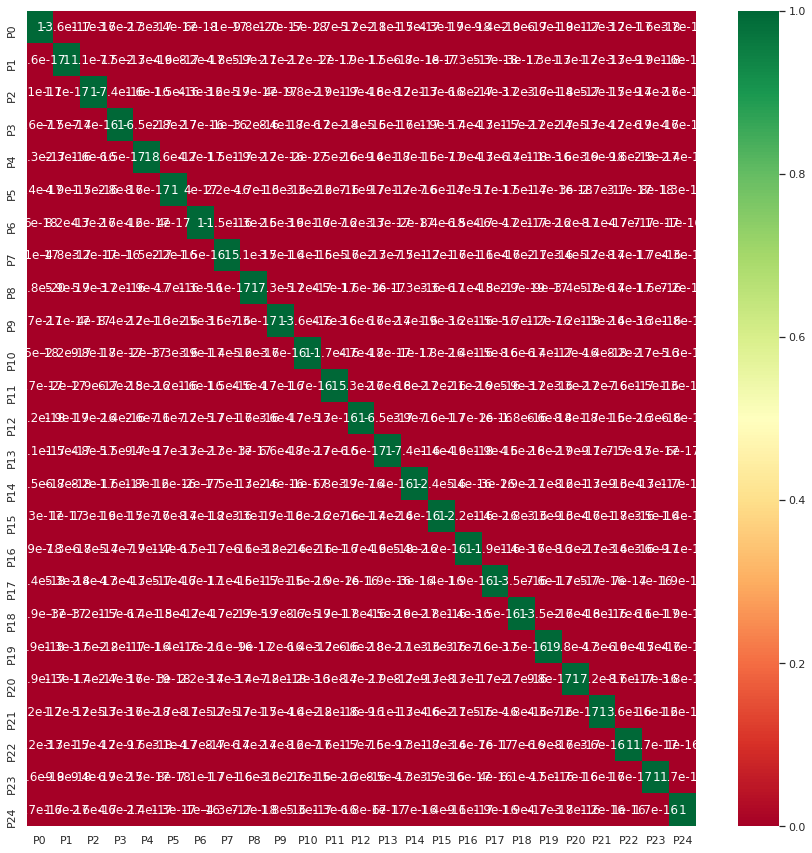

In [112]:
plt.figure(figsize=(15,15))
sns.heatmap(correlation,cmap="RdYlGn",annot=True)
plt.show()

here we plot corelation among the newly choosen 25 variales.

In [ ]:
#we will also split our data into train and test datasets and Build the model on train dataset and apply the model on test datset.
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus
from sklearn.model_selection import GridSearchCV
n_estimators=[10,50,100,200]
criterion=['gini','entropy']
min_samples_split=[2,10,15,20,25]
max_depth=[20,30,40,50,None]
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5)

In [ ]:
import itertools
import scipy
from matplotlib.pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
param_grid={'n_estimators':n_estimators,'criterion':criterion,'min_samples_split':min_samples_split,'max_depth':max_depth}
rf=RandomForestClassifier()
rf_g=RandomizedSearchCV(rf,param_grid,cv=kf,verbose=2,n_jobs=-1)
rf_g.fit(x_scaled_transf,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  8.6min finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                            

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# get importance
importance = rf_g.best_params_
print("best_params",importance)
importance = rf_g.best_index_
print("best index",importance)
importance = rf_g.best_estimator_
print("best_estimator",importance)


best_params {'n_estimators': 100, 'min_samples_split': 10, 'max_depth': 50, 'criterion': 'entropy'}
best index 7
best_estimator RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
#PREDICT USING THE TRAINED MODEL
predicted_values=rf_g.predict(x_scaled_transf)
predicted_values

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

In [ ]:
#ACCUIRACY SCORE
print("ACCUIRACY SCORE")
print(metrics.accuracy_score(y,predicted_values))

ACCUIRACY SCORE
0.9982595625173055


In [ ]:
#PRECISION RECALL MATRIX
print("precision/recall Metrics")
print(metrics.classification_report(y,predicted_values))

precision/recall Metrics
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3578
           1       1.00      1.00      1.00     21703

    accuracy                           1.00     25281
   macro avg       1.00      0.99      1.00     25281
weighted avg       1.00      1.00      1.00     25281



here we listed out the precision and recall for the prediction from our model i.e.RandomizedSearchCV and  accuracy is 99.82%.

In [ ]:
rf_g.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_g.best_score_

0.9790355297707402

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 5)
rf_small.fit(x_scaled_transf,y)
# Extract the small tree
tree_small = rf_small.estimators_[5]

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# Saving feature names for later use
feature_list = list(x_scaled_transf.columns)
# Get numerical feature importances
importances = list(rf_small.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:5} Importance: {}'.format(*pair)) for pair in feature_importances if pair];

Variable: P5    Importance: 0.65678
Variable: P2    Importance: 0.28868
Variable: P7    Importance: 0.01433
Variable: P11   Importance: 0.01366
Variable: P1    Importance: 0.01358
Variable: P4    Importance: 0.00333
Variable: P8    Importance: 0.00272
Variable: P0    Importance: 0.00109
Variable: P6    Importance: 0.00105
Variable: P22   Importance: 0.00086
Variable: P14   Importance: 0.00081
Variable: P3    Importance: 0.00057
Variable: P20   Importance: 0.00047
Variable: P12   Importance: 0.00044
Variable: P23   Importance: 0.0004
Variable: P9    Importance: 0.00038
Variable: P15   Importance: 0.00032
Variable: P24   Importance: 0.00019
Variable: P16   Importance: 0.00018
Variable: P19   Importance: 9e-05
Variable: P17   Importance: 8e-05
Variable: P10   Importance: 0.0
Variable: P13   Importance: 0.0
Variable: P18   Importance: 0.0
Variable: P21   Importance: 0.0


In [ ]:
#PREDICT USING THE TRAINED MODEL
predicted_values=rf_small.predict(x_scaled_transf)
print("predicted value is",predicted_values)

predicted value is [0.98619219 0.99268591 0.97947129 ... 0.98893885 0.97917416 0.97627824]


In [ ]:
#ACCUIRACY SCORE
print("ACCUIRACY SCORE")
print(metrics.accuracy_score(y, predicted_values.round()))

ACCUIRACY SCORE
0.9738538823622483


In [ ]:
#PRECISION RECALL MATRIX
print("precision/recall Metrics")
print(metrics.classification_report(y,predicted_values.round()))

precision/recall Metrics
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      3578
           1       0.97      1.00      0.98     21703

    accuracy                           0.97     25281
   macro avg       0.97      0.92      0.94     25281
weighted avg       0.97      0.97      0.97     25281



here we listed out the precision and recall for default prediction from our model i.e.RandomForestRegressor  and  accuracy is 97.38%.